# Simple Example

Let's have a look at the different [PlantUML](https://plantuml.com/) diagrams that the `cwl2puml` APIs are able to generate, given, for example, the [app-water-bodies.0.3.0](https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl) Workflow.

## 1. Parsing

It is needed to read first a CWL document from a remote public URL:

In [1]:
import cwl_loader

cwl_document = cwl_loader.load_cwl_from_location('https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl')

2025-09-21 19:50:28.751 | DEBUG    | cwl_loader:load_cwl_from_yaml:150 - Raw CWL document successfully parsed to the CWL Utils DOM!
2025-09-21 19:50:28.752 | DEBUG    | cwl_loader:load_cwl_from_yaml:152 - Dereferencing the steps[].run...
2025-09-21 19:50:28.752 | DEBUG    | cwl_loader:_on_process:70 - Checking if https://github.com/eoap/schemas/releases/download/0.2.0/stac-api-client.0.2.0.cwl must be externally imported...
2025-09-21 19:50:28.753 | DEBUG    | cwl_loader:_on_process:74 - run_url: https://github.com/eoap/schemas/releases/download/0.2.0/stac-api-client.0.2.0.cwl - uri: https://github.com/eoap/zarr-cloud-native-format/releases/download/0.3.0/app-water-bodies.0.3.0.cwl
2025-09-21 19:50:28.753 | DEBUG    | cwl_loader:load_cwl_from_location:213 - Loading CWL document from https://github.com/eoap/schemas/releases/download/0.2.0/stac-api-client.0.2.0.cwl...
2025-09-21 19:50:29.427 | DEBUG    | cwl_loader:_load_cwl_from_stream:216 - Reading stream from https://github.com/eoap/s

## 2. PlantUML diagrams

The samples below show how to render CWL document to a specific PlantUML diagram:

In [2]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from io import (
    StringIO,
    BytesIO
)
from IPython.display import display_png
from plantuml import deflate_and_encode
from PIL import Image
from urllib.request import urlopen

def render(
    diagram_type: DiagramType,
    debug: bool = False
):
    out = StringIO()
    to_puml(
        cwl_document=cwl_document,
        workflow_id='water-bodies',
        diagram_type=diagram_type,
        output_stream=out
    )

    clear_output = out.getvalue()

    if debug:
        print(clear_output)

    encoded = deflate_and_encode(clear_output)
    diagram_url = f"https://www.plantuml.com/plantuml/png/{encoded}"

    with urlopen(diagram_url) as url:
        img = Image.open(BytesIO(url.read()))
    display_png(img)

### 2.1 Activity diagram

The [activity](https://plantuml.com/activity-diagram-beta) diagram represents the overall CWL document instructions.

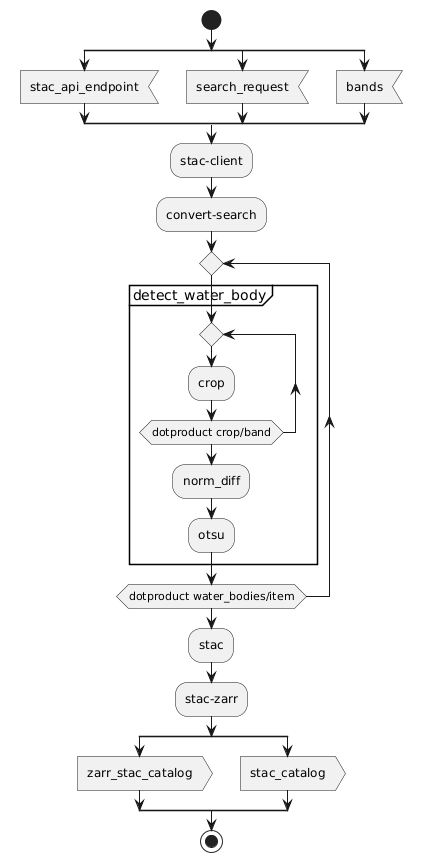

In [35]:
render(DiagramType.ACTIVITY)

### 2.2 Component diagram

The [component](https://plantuml.com/component-diagram) diagram represents the CWL document like chips on a motherboard.

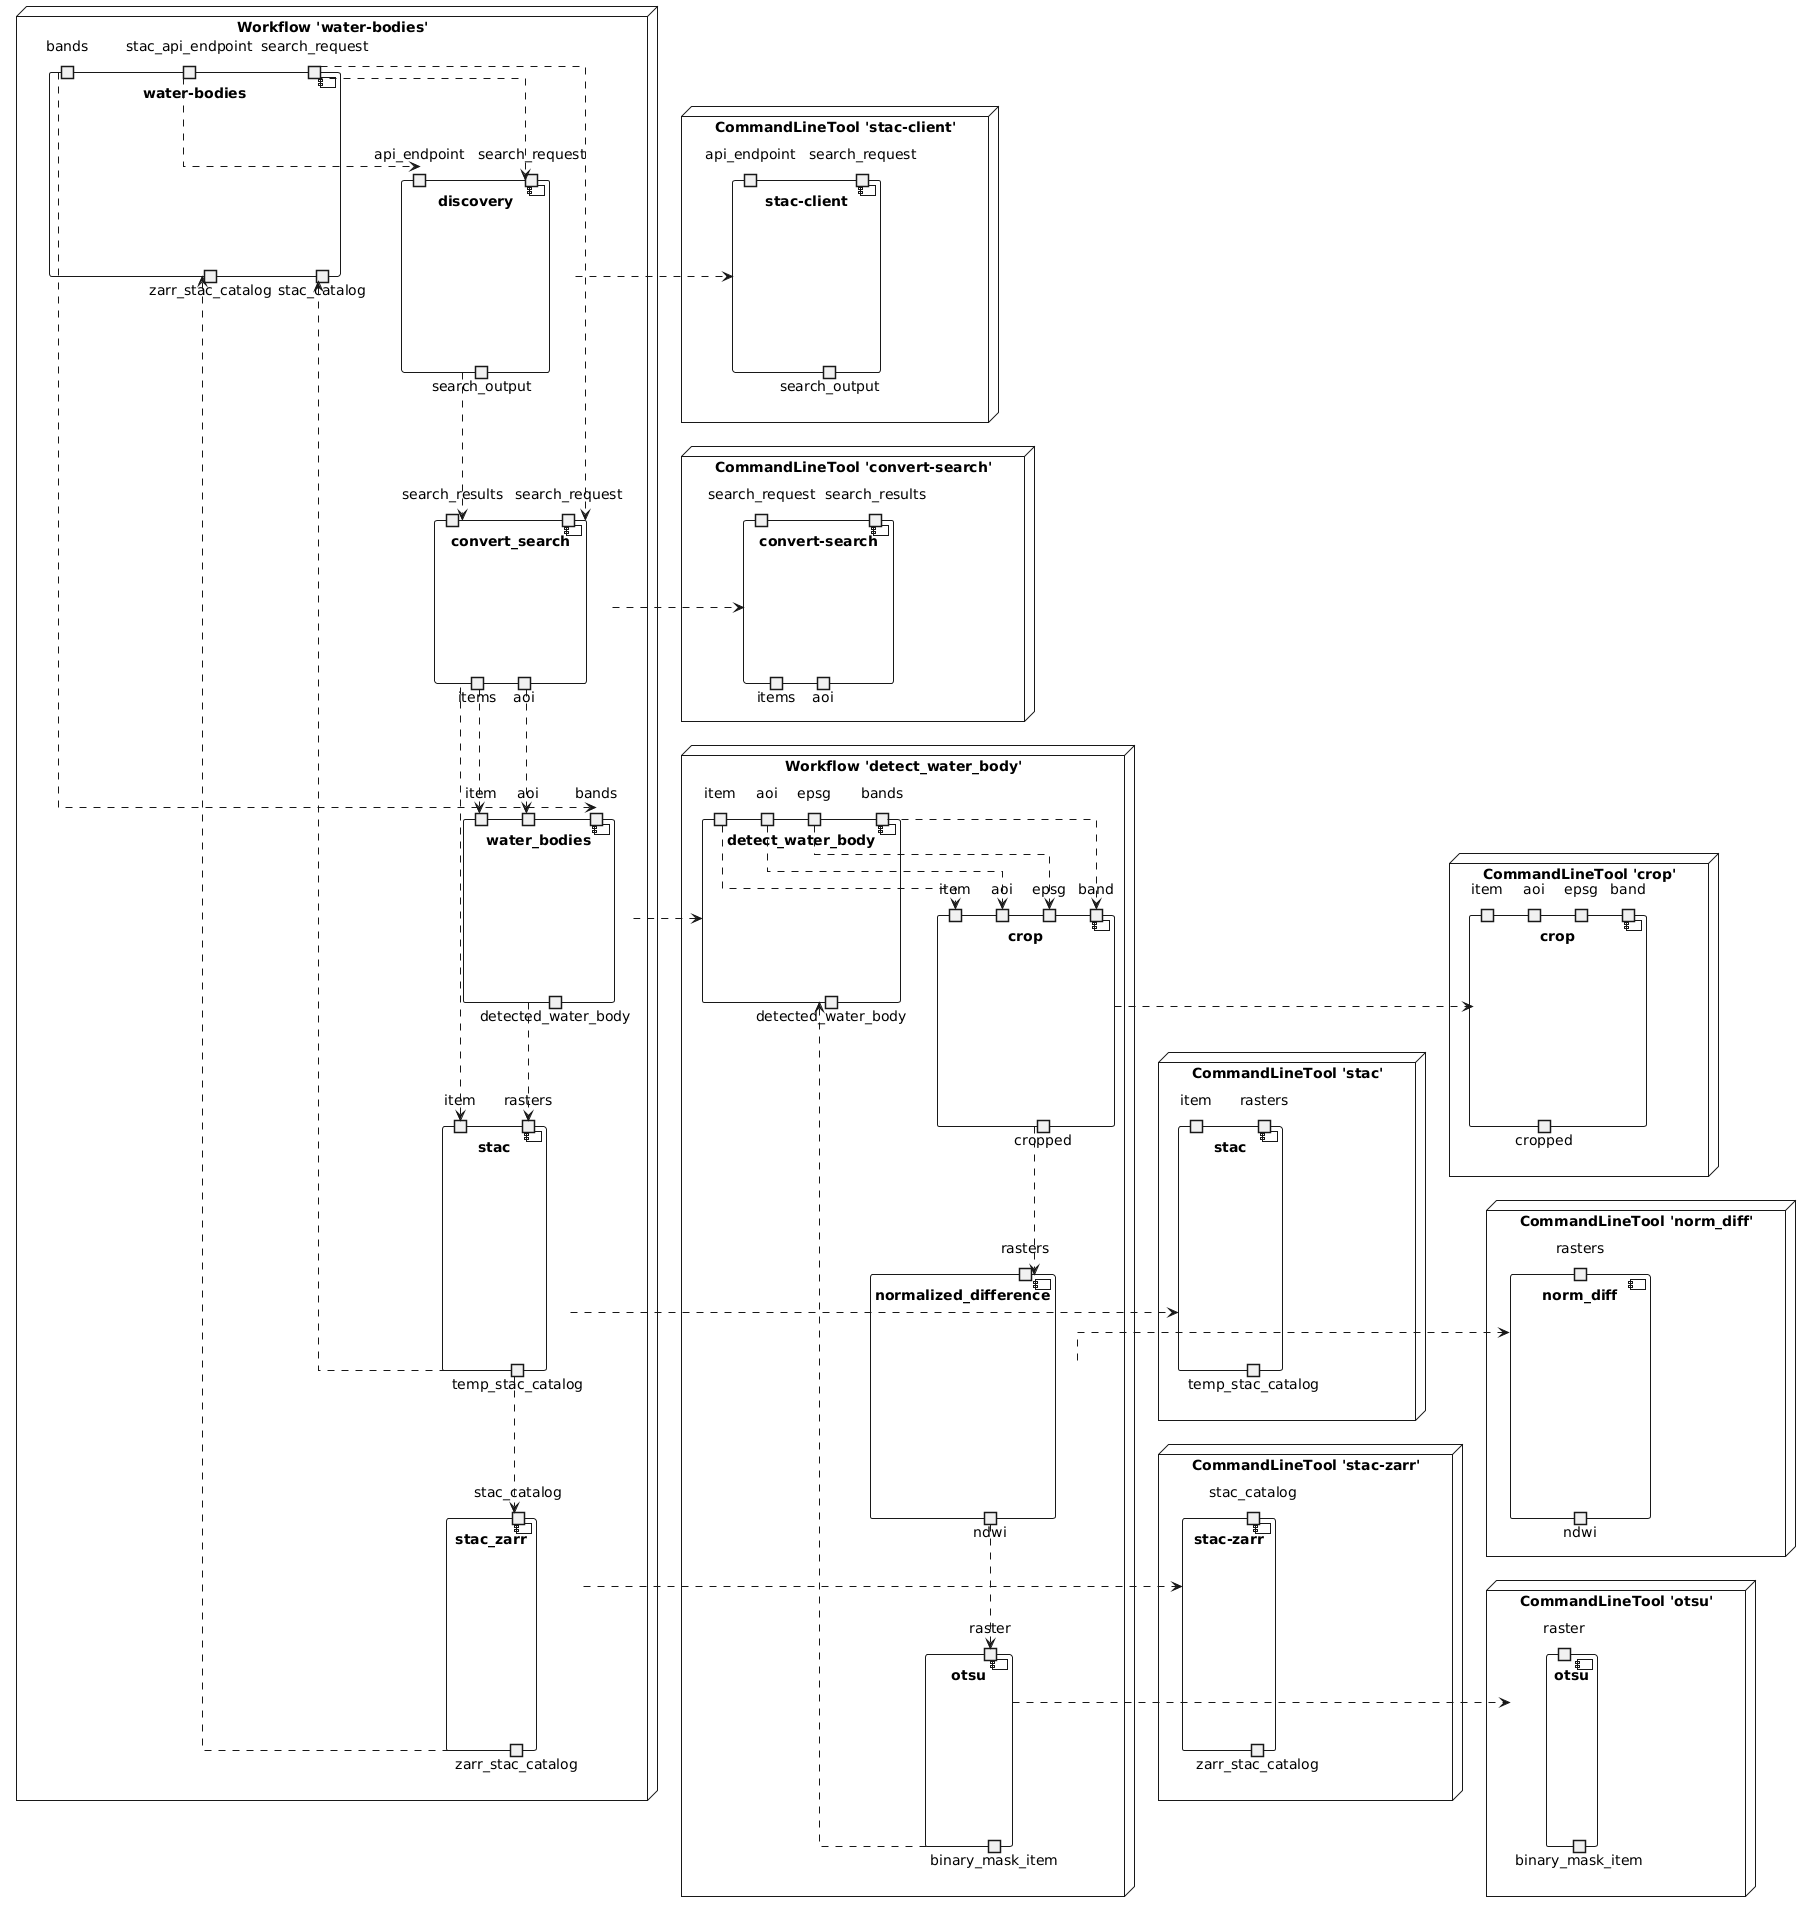

In [36]:
render(DiagramType.COMPONENT)

### 2.3 Class diagram

The [class](https://plantuml.com/class-diagram) diagram represents the CWL document like specifications of the previously illustrated chips on a motherboard.

/'
 ' Diagram generated by cwl2puml v0.18.0
 ' timestamp: 2025-09-22T00:12:02.370
 '/
@startuml







    package "Water bodies detection based on NDWI and otsu threshold applied to Sentinel-2 COG STAC items" {

    +class "water-bodies" as water_bodies extends Workflow {
        __ Inputs __
        
        + stac_api_endpoint: https://raw.githubusercontent.com/eoap/schemas/main/experimental/api-endpoint.yaml#APIEndpoint
        
        + search_request: https://raw.githubusercontent.com/eoap/schemas/main/experimental/discovery.yaml#STACSearchSettings
        
        + bands: string[] = ['green', 'nir']
        

        __ Outputs __
        
        + zarr_stac_catalog: Directory
        
        + stac_catalog: Directory
        

        
        __ Steps __
            
        - discovery: stac_client
            
        - convert_search: convert_search
            
        - water_bodies: detect_water_body
            
        - stac: stac
            
        - stac_zarr:

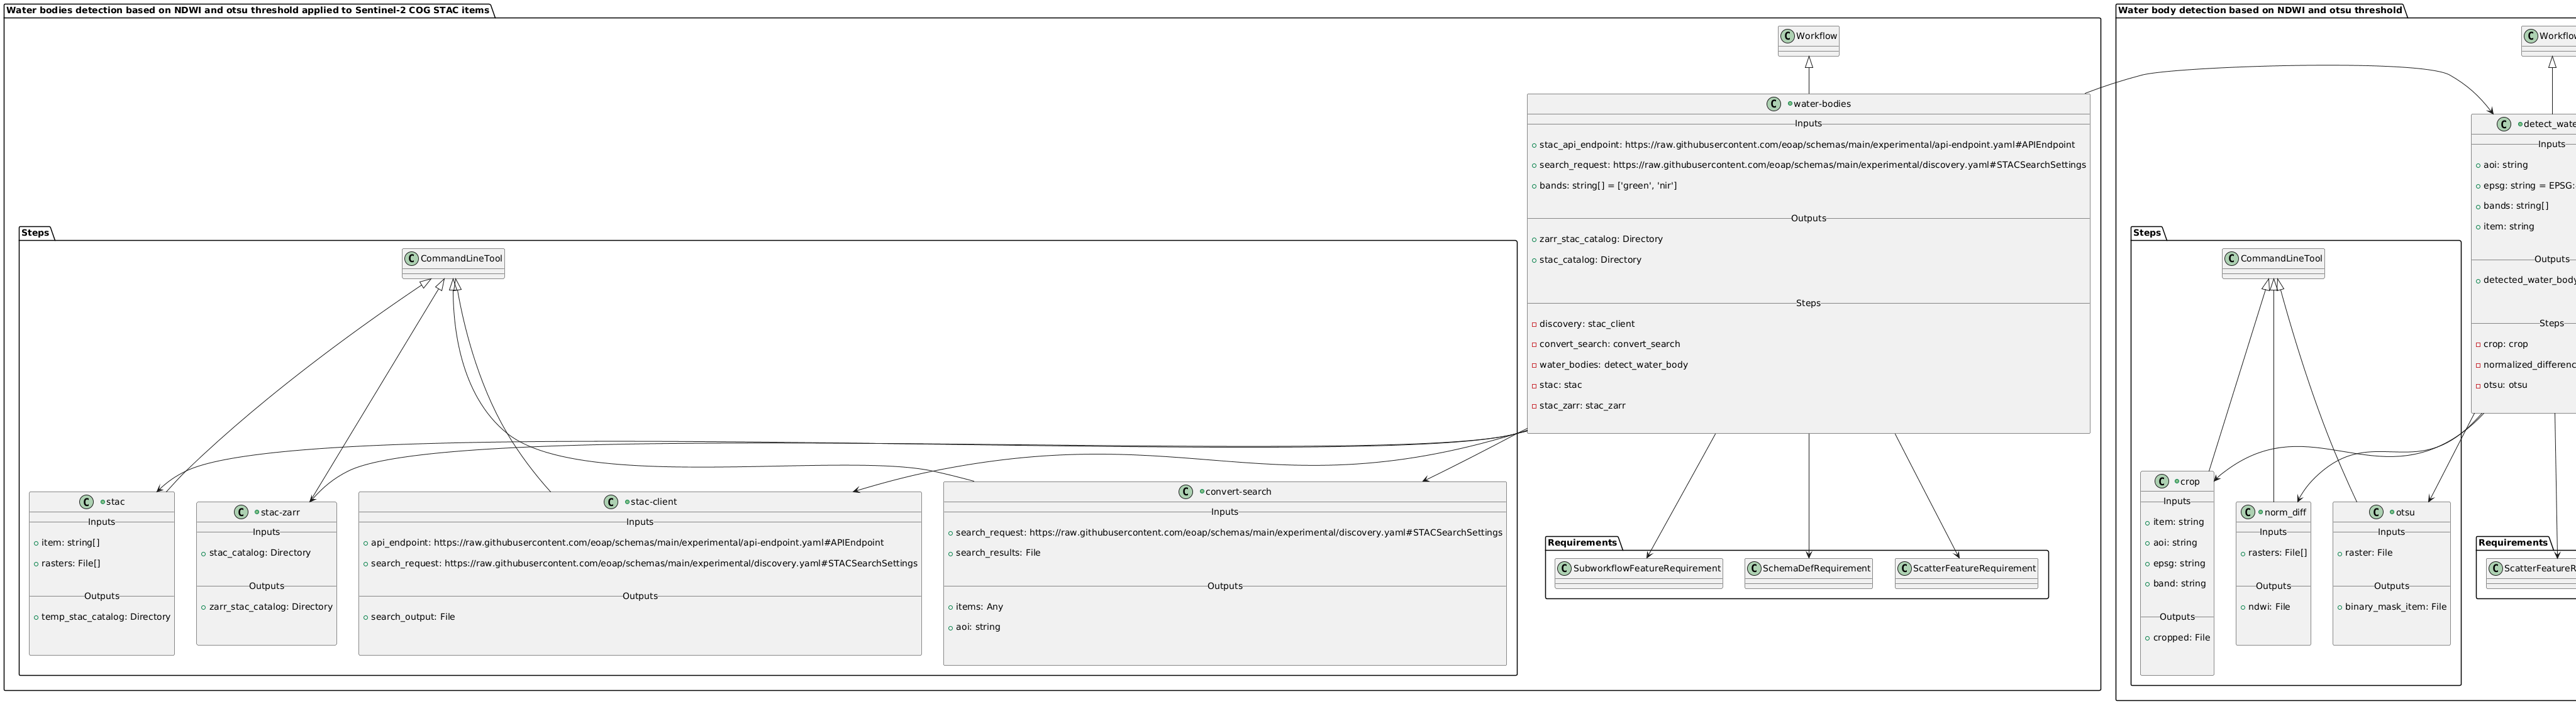

In [ ]:
render(DiagramType.CLASS)

### 2.4 Sequence diagram

The [sequence](https://plantuml.com/sequence-diagram) diagram represents how the previously illustrated chips on a motherboard are triggered and interact with each other.

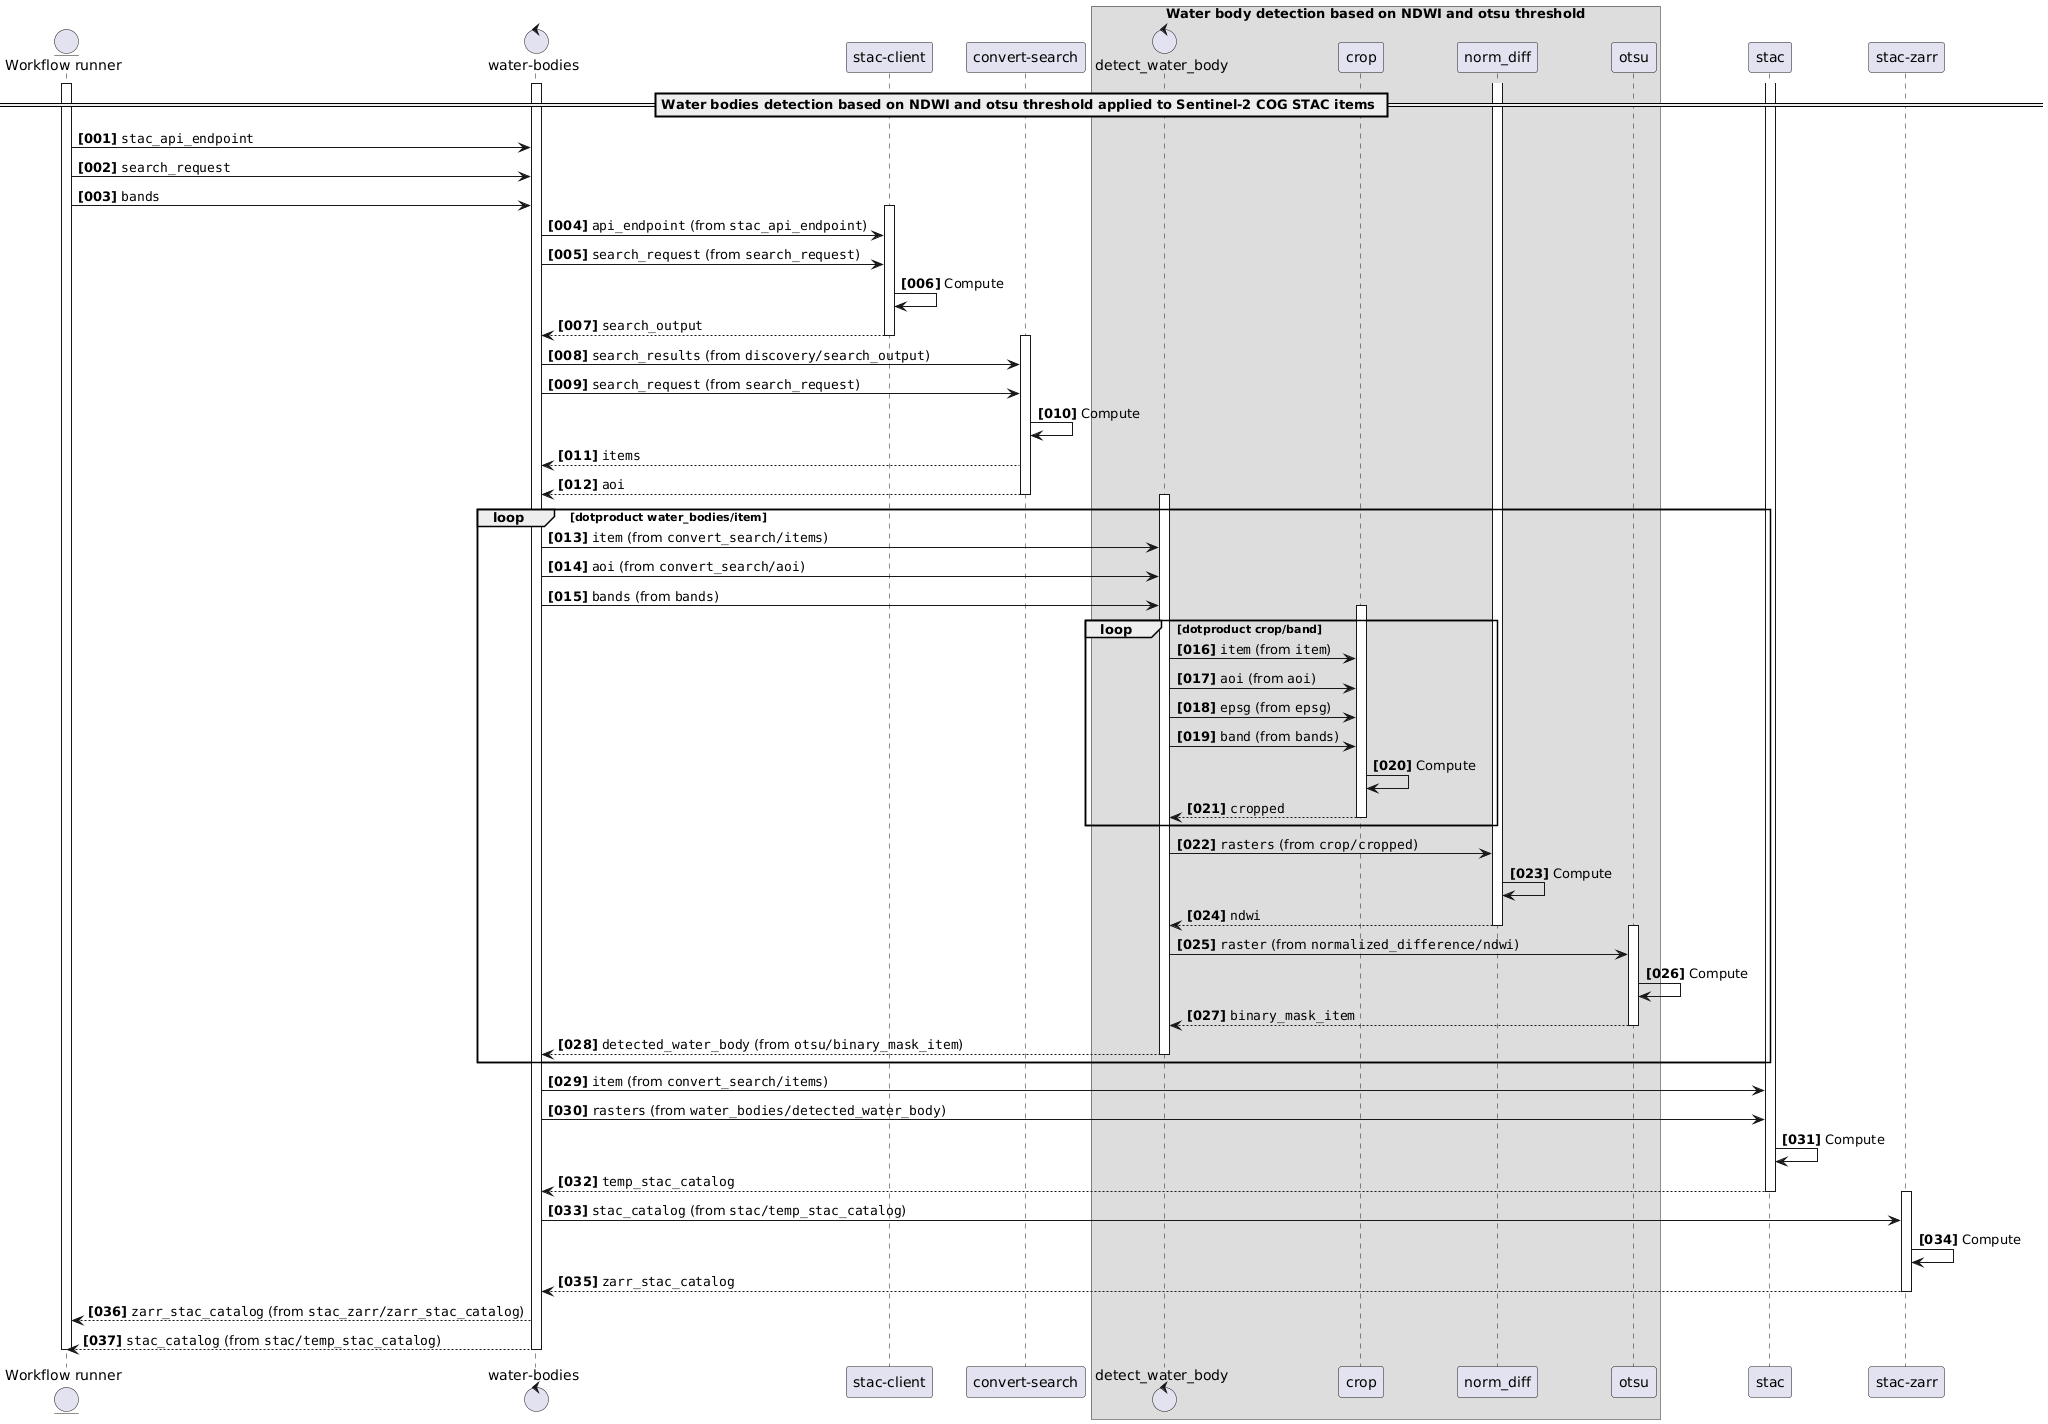

In [56]:
render(DiagramType.SEQUENCE)

### 2.5 State diagram

The [state](https://plantuml.com/state-diagram) diagram represents the dependencies between the inputs/outputs of the previously illustrated chips on a motherboard.

In [57]:
render(DiagramType.STATE)

TemplateSyntaxError: expected name or number